In [6]:
! git clone https://github.com/conorgibbons147/EDA.git

Cloning into 'EDA'...
remote: Enumerating objects: 67, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 67 (delta 13), reused 10 (delta 10), pack-reused 43 (from 1)
Receiving objects: 100% (67/67), 25.03 MiB | 19.87 MiB/s, done.
Resolving deltas: 100% (20/20), done.


# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/ds4e/EDA`
### Do Q1 and two other questions.

**Q1.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
3. Show that $\text{cov}(a+bX,a+bX) = b^2 \text{cov}(X,X) $, and in particular that $\text{cov}(X,X) = s^2 $.
4. Instead of the mean, consider the median. Consider transformations that are non-decreasing (if $x\ge x'$, then $g(x)\ge g(x')$), like $2+5 \times X$ or $\text{arcsinh}(X)$. Is a non-decreasing transformation of the median the median of the transformed variable? Explain. Does your answer apply to any quantile? The IQR? The range?
5. Consider a non-decreasing transformation $g()$. Is is always true that $m(g(X))= g(m(X))$?

I uploaded a pdf of my written answers in the assignment folder of the repo.

**Q2.** This question looks at financial transfers from foreign entities to American universities. In particular, from which countries and giftors are the gifts coming from, and to which institutions are they going? For this question, `.groupby([vars]).count()` and `.groupby([vars]).sum()` will be especially useful to tally the number of occurrences and sum the values of those occurrences.

1. Load the `./data/ForeignGifts_edu.csv` dataset.
2. For `Foreign Gift Amount`, create a histogram and describe the variable. Describe your findings.
3. For `Gift Type`, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?
4. Create a kernel density plot of the log of `Foreign Gift Amount`, and then a kernel density plot of the log of `Foreign Gift Amount` conditional on gift type. Do you notice any patterns?
5. What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?
6. What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions.
7. Which giftors provide the most money, in total?

**Q3.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. This provides a dataset of AirBnB rental properties for New York City.  
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

In [47]:
# 1.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv('EDA/assignment/data/airbnb_hw.csv')

In [33]:
# 2.
df.shape
df.head()
# The dimensions are 30478 x 13.
# There are 13 observations including Host Id, Host Since, Name, Neighbourhood, Property Type, Revew Scores Rating (bin), Room Type, Zipcode, Beds, Number of Records, Number of Reviews, Price, Review Scores Rating

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


In [34]:
# 3.
pd.crosstab(df['Room Type'], df['Property Type'])
# We see that apartments absolutely dominate in terms of quantity with Houses being behind them by a significant margin.
# Properties that tend to have a private room rather than the whole unit are houses, dorms, and bed & breakfasts. There are many properties that have one private room and zero entire properties which seems to insignifcant to count.

Property Type,Apartment,Bed & Breakfast,Boat,Bungalow,Cabin,Camper/RV,Castle,Chalet,Condominium,Dorm,House,Hut,Lighthouse,Loft,Other,Tent,Townhouse,Treehouse,Villa
Room Type,,,,,,,,,,,,,,,,,,,
Entire home/apt,15669,13,7,4,1,6,0,0,72,4,752,0,1,392,14,0,83,0,4
Private room,10748,155,1,0,1,1,1,1,22,16,1258,2,0,312,29,4,52,1,4
Shared room,685,12,0,0,0,0,0,0,0,11,80,0,0,49,4,0,1,3,0


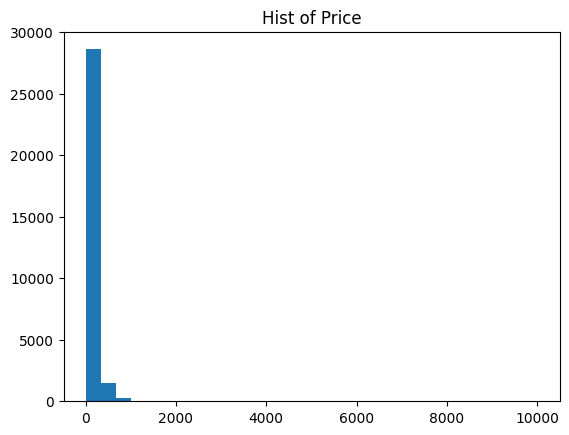

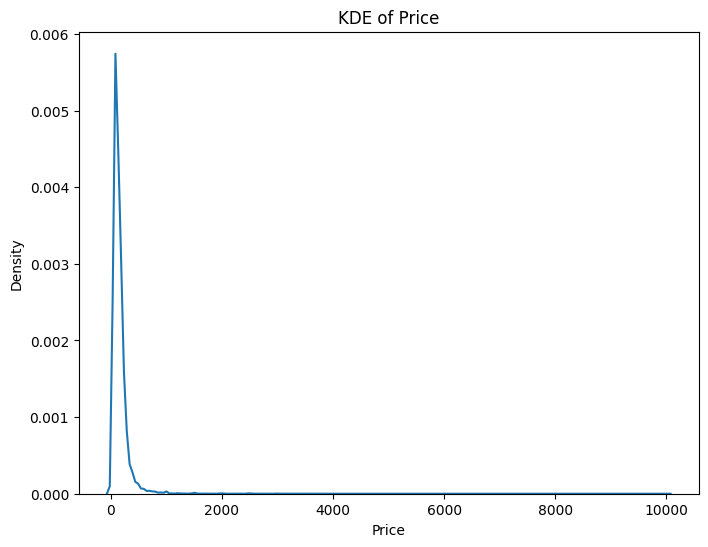

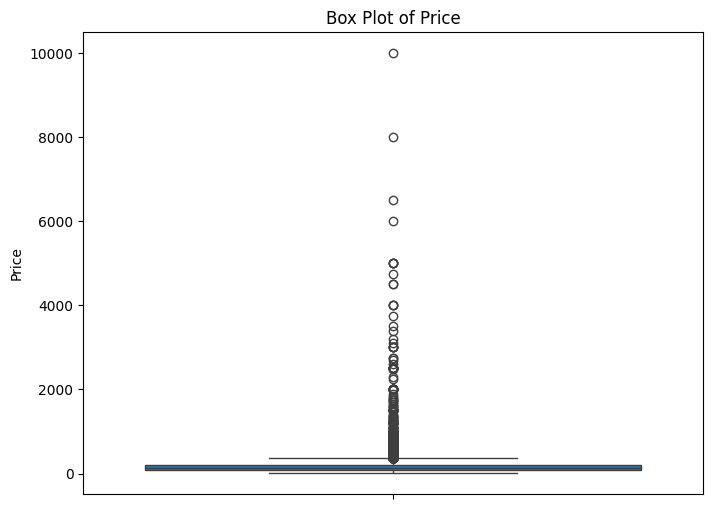

count    30478.000000
mean       163.589737
std        197.785454
min         10.000000
25%         80.000000
50%        125.000000
75%        195.000000
max      10000.000000
Name: Price, dtype: float64


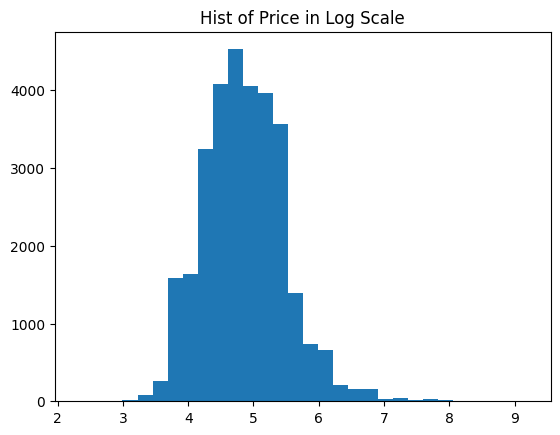

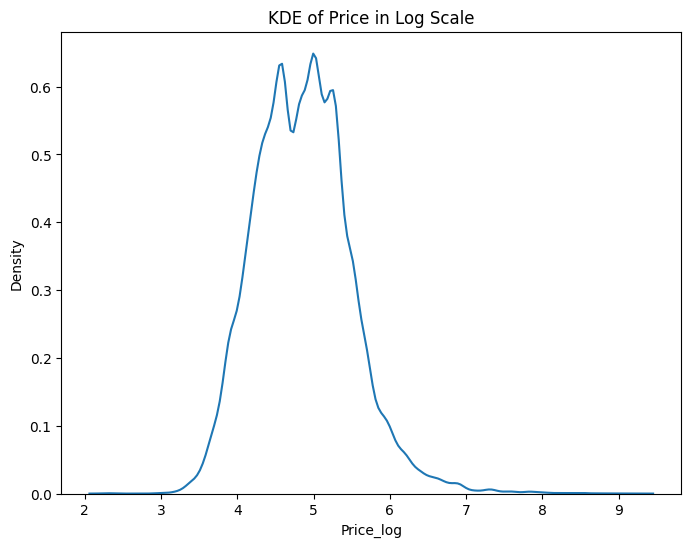

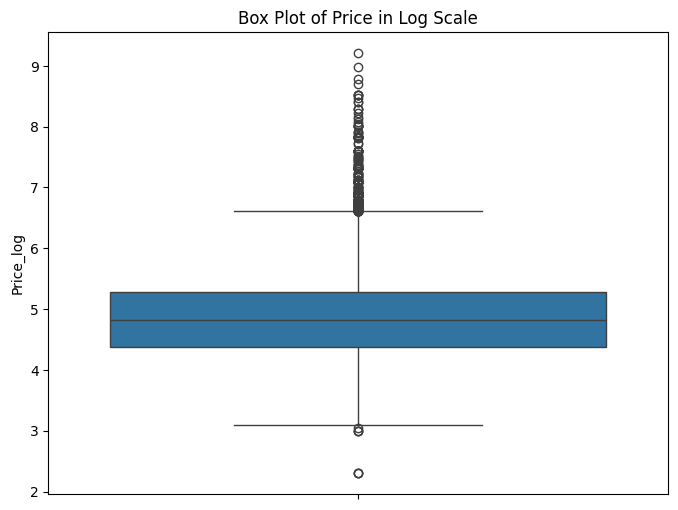

count    30478.000000
mean         4.860495
std          0.627704
min          2.302585
25%          4.382027
50%          4.828314
75%          5.273000
max          9.210340
Name: Price_log, dtype: float64


In [49]:
# 4.
# Clean and make price numeric
df['Price'] = df['Price'].replace('\$', '', regex=True)
df['Price'] = df['Price'].replace(',', '', regex=True)
df['Price'] = df['Price'].replace(' ', '', regex=True)
df['Price'] = pd.to_numeric(df['Price'])

# Histogram
plt.hist(df['Price'], bins=30)
plt.title('Hist of Price')

# KDE
plt.figure(figsize=(8, 6))
sns.kdeplot(df['Price'])
plt.title('KDE of Price')
plt.show()

# Box plot
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['Price'])
plt.title('Box Plot of Price')
plt.show()

# Describe
print(df['Price'].describe())

# There are many outliers and the majority of the data is so tightly concentrated
# Now for log scale
df['Price_log'] = np.log(df['Price'])

# Histogram
plt.hist(df['Price_log'], bins=30)
plt.title('Hist of Price in Log Scale')

# KDE
plt.figure(figsize=(8, 6))
sns.kdeplot(df['Price_log'])
plt.title('KDE of Price in Log Scale')
plt.show()

# Box plot
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['Price_log'])
plt.title('Box Plot of Price in Log Scale')
plt.show()

# Describe
print(df['Price_log'].describe())

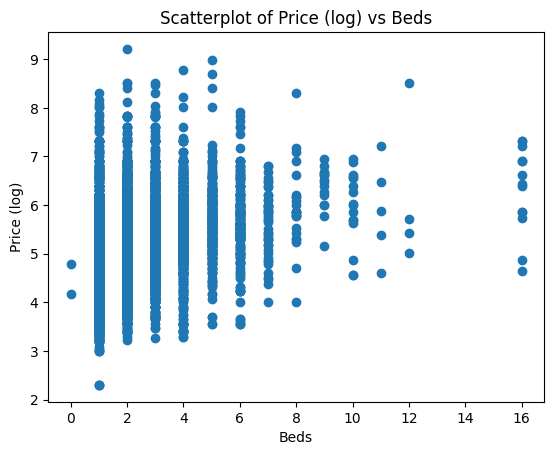

,count,mean,std,min,25%,50%,75%,max
Beds,,,,,,,,
0.0,2.0,92.000000,38.183766,65.0,78.50,92.0,105.50,119.0
1.0,20344.0,127.673810,107.047827,10.0,75.00,100.0,155.00,4000.0
2.0,6610.0,199.061271,225.706318,25.0,115.00,160.0,225.00,10000.0
3.0,2071.0,268.118300,303.106942,26.0,140.00,200.0,300.00,5000.0
4.0,783.0,315.332056,353.184402,27.0,150.00,247.0,375.00,6500.0
5.0,284.0,411.500000,672.610659,35.0,189.75,290.0,450.00,8000.0
6.0,177.0,401.768362,417.018431,35.0,199.00,275.0,425.00,2750.0
7.0,45.0,341.377778,220.116631,55.0,177.00,300.0,445.00,900.0
8.0,24.0,589.041667,793.054934,55.0,243.75,350.0,481.25,4000.0


In [56]:
# 5.
# Create scatter plot
plt.scatter(df['Beds'], df['Price_log'])
plt.title('Scatterplot of Price (log) vs Beds')
plt.xlabel('Beds')
plt.ylabel('Price (log)')
plt.show()

# Describe based on grouping
df.groupby('Beds')['Price'].describe()

# The mean generally trends upwards as the number of rooms increases.
# The standard deviation doesn't show a clear trend, other than that it generally increased for the first couple increases in number of beds, but it flucuates after that.

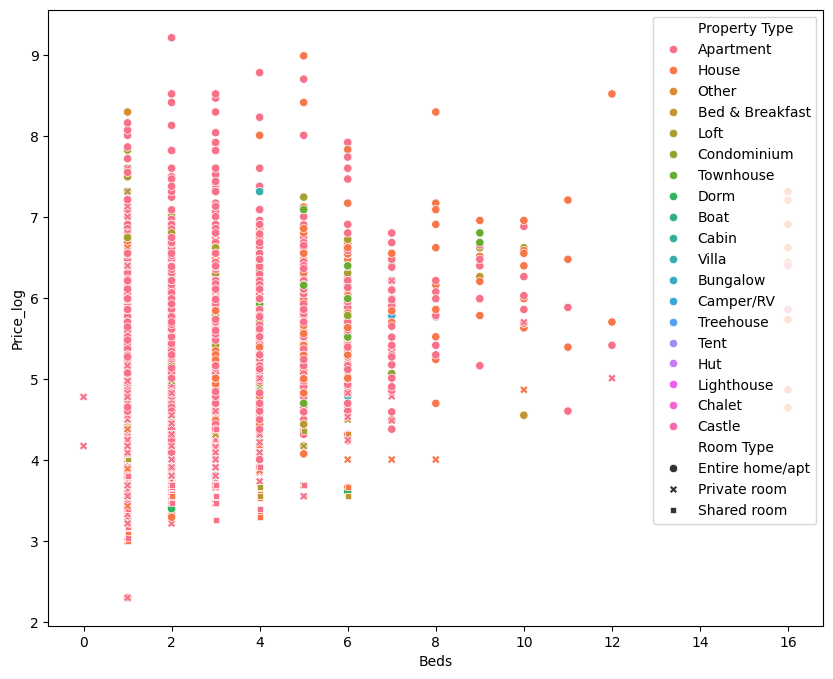

                   count        mean         std    min     25%    50%  \
Property Type                                                            
Apartment        27102.0  162.045642  181.376882   10.0   85.00  130.0   
Bed & Breakfast    180.0  106.572222   84.701977   30.0   65.00   87.5   
Boat                 8.0  153.625000   49.231051  100.0  120.00  137.5   
Bungalow             4.0  150.750000   46.464144   87.0  133.50  160.5   
Cabin                2.0  165.000000  120.208153   80.0  122.50  165.0   
Camper/RV            7.0  103.571429  102.343958   39.0   47.00   49.0   
Castle               1.0  150.000000         NaN  150.0  150.00  150.0   
Chalet               1.0   99.000000         NaN   99.0   99.00   99.0   
Condominium         94.0  256.585106  249.357946   46.0  131.25  175.0   
Dorm                31.0   76.354839   42.424481   30.0   52.50   65.0   
House             2090.0  156.722967  307.116948   10.0   60.00   85.0   
Hut                  2.0   75.000000  

In [66]:
# 6.

# Scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='Beds', y='Price_log', hue='Property Type', style='Room Type')
plt.show()

# It is incredibly difficult to discern patterns given the vast property types. One thing that becomes very clear is the dominance of apartments in the data.

print(df.groupby('Property Type')['Price'].describe())
print(df.groupby('Room Type')['Price'].describe())

# The room type with highest prices is Entire home/apt based on median price.
# The property type with highest prices is Villa based on median price.

# Highest room type standard deviation is Entire home/apt.
# Highest property type standard deviation is other.

# Since there are so many outliers, the median appears to be a more reliable estimate of central tendency.

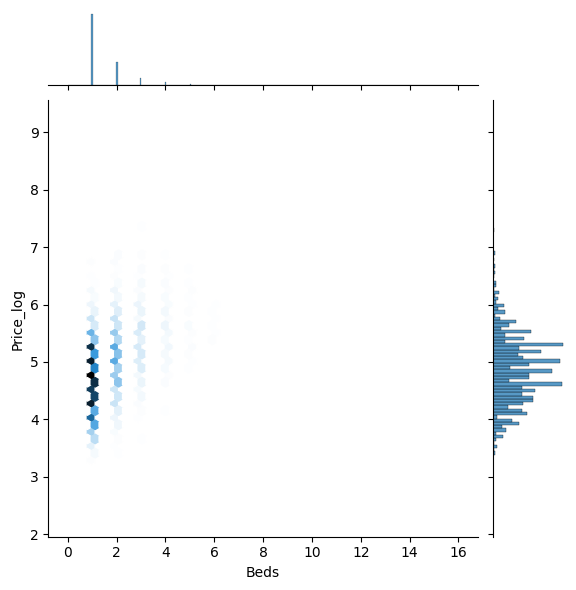

In [69]:
# 7.
sns.jointplot(x=df['Beds'], y=df['Price_log'], kind='hex')
plt.show()

# The data are distributed mostly around 1-2 beds and at a price (log) of around 4.8
# This Shows me how much the data is centralized and how extreme the outliers are. This confirms my belief that the median is more reliable of an indicator than is mean.

**Q4.** This question looks at a time series of the number of active oil drilling rigs in the United States over time. The data comes from the Energy Information Agency.

1. Load `./data/drilling_rigs.csv` and examine the data. How many observations? How many variables? Are numeric variables correctly read in by Pandas, or will some variables have to be typecast/coerced? Explain clearly how these data need to be cleaned.
2. To convert the `Month` variable to an ordered datetime variable, use `df['time'] = pd.to_datetime(df['Month'], format='mixed')`.
3. Let's look at `Active Well Service Rig Count (Number of Rigs)`, which is the total number of rigs over time. Make a line plot of this time series. Describe what you see.
4. Instead of levels, we want to look at change over time. Compute the first difference of  `Active Well Service Rig Count (Number of Rigs)` and plot it over time. Describe what you see.
5. The first two columns are the number of onshore and offshore rigs, respectively. Melt these columns and plot the resulting series.